<a href="https://colab.research.google.com/github/priyaregit/Regresssion-ML_Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/priyaregit/Regresssion-ML_Retail-Sales-Prediction.git

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

# Importing datetime module
from datetime import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from xgboost import XGBRegressor

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

# Importing Matplotlib and Seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing warnings library to filter some warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Loading Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading both the data sets from Google drive and storing it as dataframes: ds1 and ds2
ds1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised Learning- Regression/Rossmann Stores Data.csv')
ds2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised Learning- Regression/store.csv')

# Setting the option to display upto 50 columns of the dataframe
pd.set_option ("display.max_columns", 50)

### Dataset First View

In [ ]:
# Dataset First Look

# Checking the head (i.e. first 5 rows) of ds1
ds1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Checking the head of ds2
ds2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

# Checking the shape of ds1 and ds2
ds1.shape , ds2.shape

((1017209, 9), (1115, 10))

### Dataset Information

In [ ]:
# Dataset Info

# Checking information about dataset 'ds1'
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Checking information about dataset 'ds2'
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(f"The duplicate data present in ds1 is: {ds1.duplicated().sum()}")
print(f"The duplicate data present in ds2 is: {ds2.duplicated().sum()}")

The duplicate data present in ds1 is: 0
The duplicate data present in ds2 is: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

print(f"The number of missing/null values in dataset 'ds1' are: ")
print(ds1.isnull().sum())
print('\n')
print(f"The number of missing/null values in dataset 'ds2' are: ")
print(ds2.isnull().sum())

The number of missing/null values in dataset 'ds1' are: 
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


The number of missing/null values in dataset 'ds2' are: 
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


<Axes: >

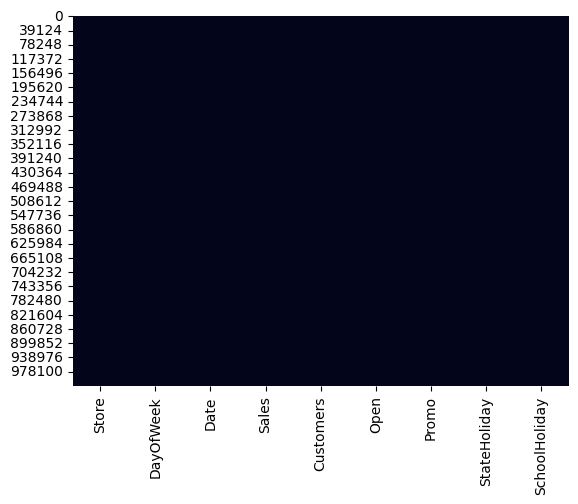

In [ ]:
# Visualizing the missing values

# Checking for missing/null values by plotting Heatmap of ds1
sns.heatmap(ds1.isnull(), cbar=False)

<Axes: >

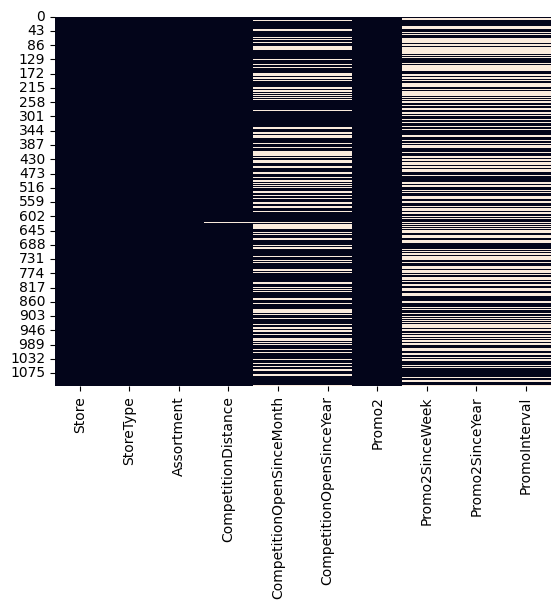

In [ ]:
# Checking for missing/null values by plotting Heatmap of ds2
sns.heatmap(ds2.isnull(), cbar=False)

### What did you know about your dataset?

 There are 1,017,209 rows and 9 columns in dataset 'ds1'

 There are 1,115 rows and 10 columns in dataset 'ds2'

 The two datasets have one common feature which is 'Store'

Neither of the datasets contain any duplicate data.

The dataset 'ds1' has no missing/null values.

The dataset 'ds2' contains missing/null values in the columns: 'CompetitionDistance ', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval'.
              
  

 The features: 'Date', 'StateHoliday', 'StoreType', 'Assortment' and 'PromoInterval', are of object data type.

The rest of the features are either of integer or float data type, thereby indicating that they are numeric data.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

print(f"The columns in ds1 are: \n",list(ds1.columns))
print('\n')
print(f"The columns in ds2 are: \n",list(ds2.columns))


The columns in ds1 are: 
 ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


The columns in ds2 are: 
 ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [ ]:
# Dataset Describe

# Checking for statistics of the numeric columns in ds1
ds1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


We can see that the maximum sales turnover is 41,551 while the mean sales value is 5,773.

The maximum number of customers visiting a store is 7,388 while the mean value of customer footfalls is 633.

In [ ]:
# Checking for statistics of the numeric columns in ds2
ds2.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


There are a total of 1,115 Rossmann stores.

The mean distance of a competitor is 5,405 metres while the farthest competitor is at a distance of 75,860 metres, the median competition distance being 2,325 metres.

The oldest competitor is open since 1900.

Promo2 has been running since 2009.

### Variables Description

The contents of the datasets are:

ds1  - Historical sales data of Rosmmann stores

ds2  - Supplemental information about the stores

The variables/features present in the datasets are:

*  Store - a unique Id for each store
* DayOfWeek - indicates the day of the week: 1 = Monday, 2 = Tuesday, 3 = Wednesday, 4 = Thursday, 5 = Friday, 6 = Saturday, 7 = Sunday
*  Date - gives the date for which the data is provided
* Sales - the turnover for any given day
* Customers - the number of customers on a given day
*  Open - an indicator for whether the store was open: 0 = closed, 1 = open
*  StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the store was affected by the closure of public schools on a given day
*  StoreType - differentiates between 4 different store models: a, b, c, d
*  Assortment - describes an assortment level: a = basic, b = extra, c = extended
*  CompetitionDistance - distance in meters to the nearest competitor store
*  CompetitionOpenSinceMonth - gives the month when the nearest competitor was opened
*  CompetitionOpenSinceYear - gives the year when the nearest competitor was opened
*  Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
*  Promo2SinceWeek - gives the calendar week when the store started participating in Promo2
*  Promo2SinceYear - gives the year when the store started participating in Promo2
*  PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. Ex: "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in ds1.columns.tolist():
  print("No. of unique values in ",i,"is",ds1[i].nunique())

print('\n')

for i in ds2.columns.tolist():
  print("No. of unique values in ",i,"is",ds2[i].nunique())


No. of unique values in  Store is 1115
No. of unique values in  DayOfWeek is 7
No. of unique values in  Date is 942
No. of unique values in  Sales is 21734
No. of unique values in  Customers is 4086
No. of unique values in  Open is 2
No. of unique values in  Promo is 2
No. of unique values in  StateHoliday is 5
No. of unique values in  SchoolHoliday is 2


No. of unique values in  Store is 1115
No. of unique values in  StoreType is 4
No. of unique values in  Assortment is 3
No. of unique values in  CompetitionDistance is 654
No. of unique values in  CompetitionOpenSinceMonth is 12
No. of unique values in  CompetitionOpenSinceYear is 23
No. of unique values in  Promo2 is 2
No. of unique values in  Promo2SinceWeek is 24
No. of unique values in  Promo2SinceYear is 7
No. of unique values in  PromoInterval is 3


## 3. ***Data Wrangling***

We can be more efficient working on a single (combined) dataset rather than two. Hence, I merge both the data sets on the basis of the common feature of 'Store'

### Data Wrangling Code

In [45]:
# Merging dataset ds2 with the dataset ds1, based on the column 'Store' and through an outer join

df = ds1.merge(ds2, on ='Store', how = 'outer')

# Checking for the shape of the new dataframe 'df' formed after merger
df.shape

(1017209, 18)

In [ ]:
# Checking the first 5 rows of the merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27


In [ ]:
# Converting data type of the column 'Date' from object to datetime

df['Date'] =  pd.to_datetime(df['Date'], format="%Y-%m-%d")

In [ ]:
# Creating three new columns to show the date in the form of year, month and day

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

### What all manipulations have you done and insights you found?

* I merged the two datasets and created a new dataframe named 'df' with the combined data. The merged dataset contains 1,017,209 observations with 18 features.

* I have also converted the 'Date' column from 'object' data type to date-time format.

The rest of the data manipulation would be done as part of data pre-processing and feature engineering process.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

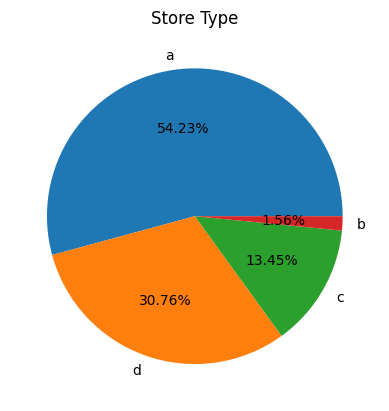

In [ ]:
# Chart - 1 visualization code

# Plotting a Pie Chart to visualize the number of stores by type
plt.pie(df['StoreType'].value_counts(), labels = df['StoreType'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Store Type", fontsize = 12)

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Finding the value count of each Store type
ds2['StoreType'].value_counts().reset_index().rename(columns={'index':'Store Type','StoreType': 'Count'})

,Store Type,Count
0,a,602
1,d,348
2,c,148
3,b,17


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Majority of the stores are of type 'a' (54.23%), followed by type 'd' (30.76%) and type 'c' (13.45%) respectively. Only 17 of the total 1115 Rossmann stores (1.76%) are of type 'b'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 2

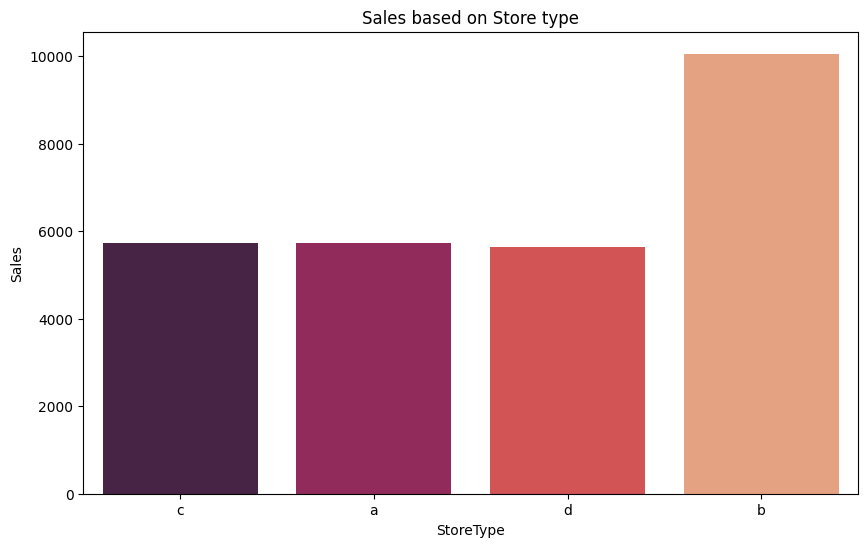

In [ ]:
# Chart - 2 visualization code

# Barplot to check Sales according to Store type
sns.barplot(x ='StoreType', y ='Sales', data = df, palette= 'rocket', ci = None)
plt.title('Sales based on Store type')
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The sales in store type 'b' surpasses that of the other store types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

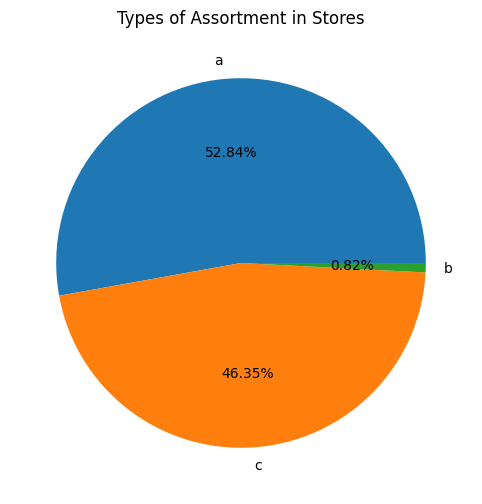

In [ ]:
# Chart - 3 visualization code

# Plotting a Pie Chart to visualize the number of stores by assortment
plt.pie(df['Assortment'].value_counts(), labels = df['Assortment'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Types of Assortment in Stores", fontsize = 12)

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

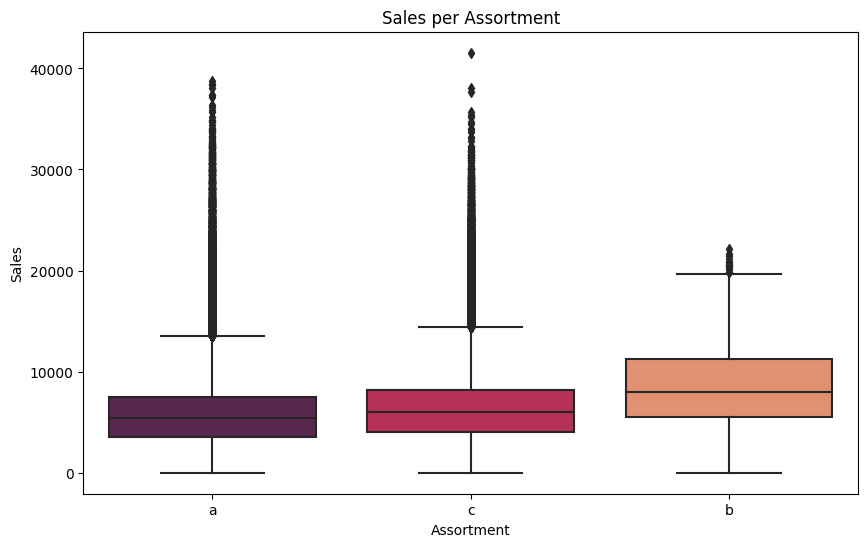

In [ ]:
# Chart - 4 visualization code

# Boxplot to check Sales according to Assortments
sns.boxplot(x ='Assortment', y ='Sales', data = df, palette= 'rocket')
plt.title('Sales per Assortment')
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The average sales of stores with assortment type 'b' (i.e. extra assortment) is highest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

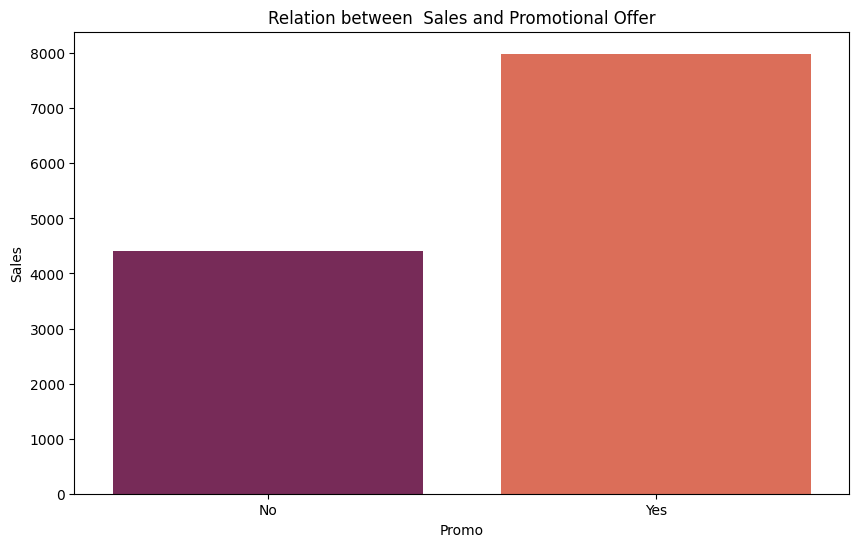

In [ ]:
# Chart - 5 visualization code

# Barplot to check for the effect of Promo on Sales
sns.barplot(data = df, x = 'Promo', y = 'Sales', palette= 'rocket', ci = None)

# Giving a title to the plot
plt.title("Relation between  Sales and Promotional Offer")
plt.xticks([0,1], labels = ['No', 'Yes'])

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The presence of promotional offer greatly affects sales. The average sales nearly doubles when there is a promo in the store.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

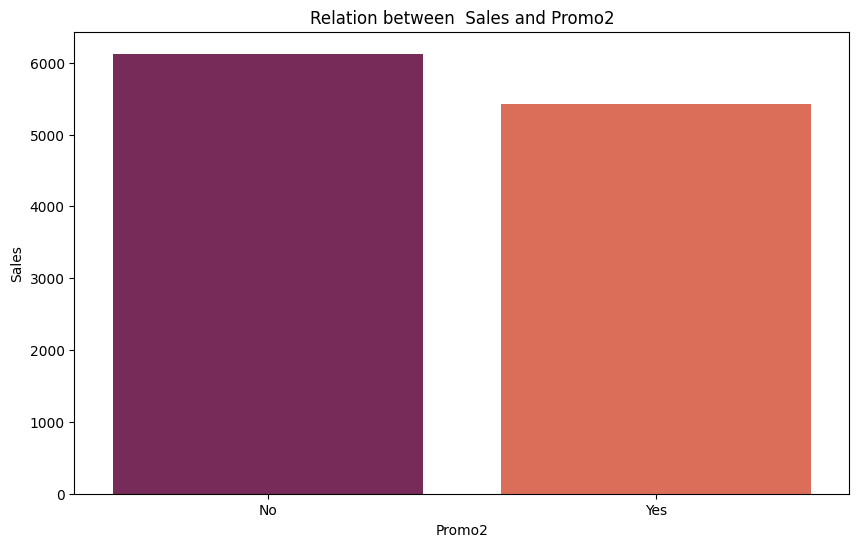

In [ ]:
# Chart - 6 visualization code

# Barplot to check for the effect of Promo2 on Sales
sns.barplot(data = df, x = 'Promo2', y = 'Sales', palette= 'rocket', ci = None)

# Giving a title to the plot
plt.title("Relation between  Sales and Promo2")
plt.xticks([0,1], labels = ['No', 'Yes'])

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Promo2 marginally improves the sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

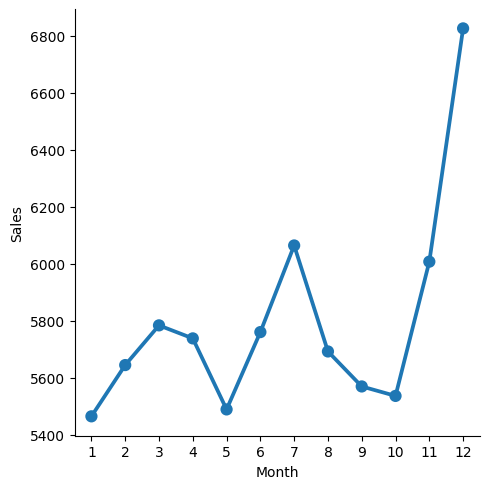

In [ ]:
# Chart - 7 visualization code

sns.catplot(x = "Month", y = "Sales" , data = df, kind = "point", ci = None)
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

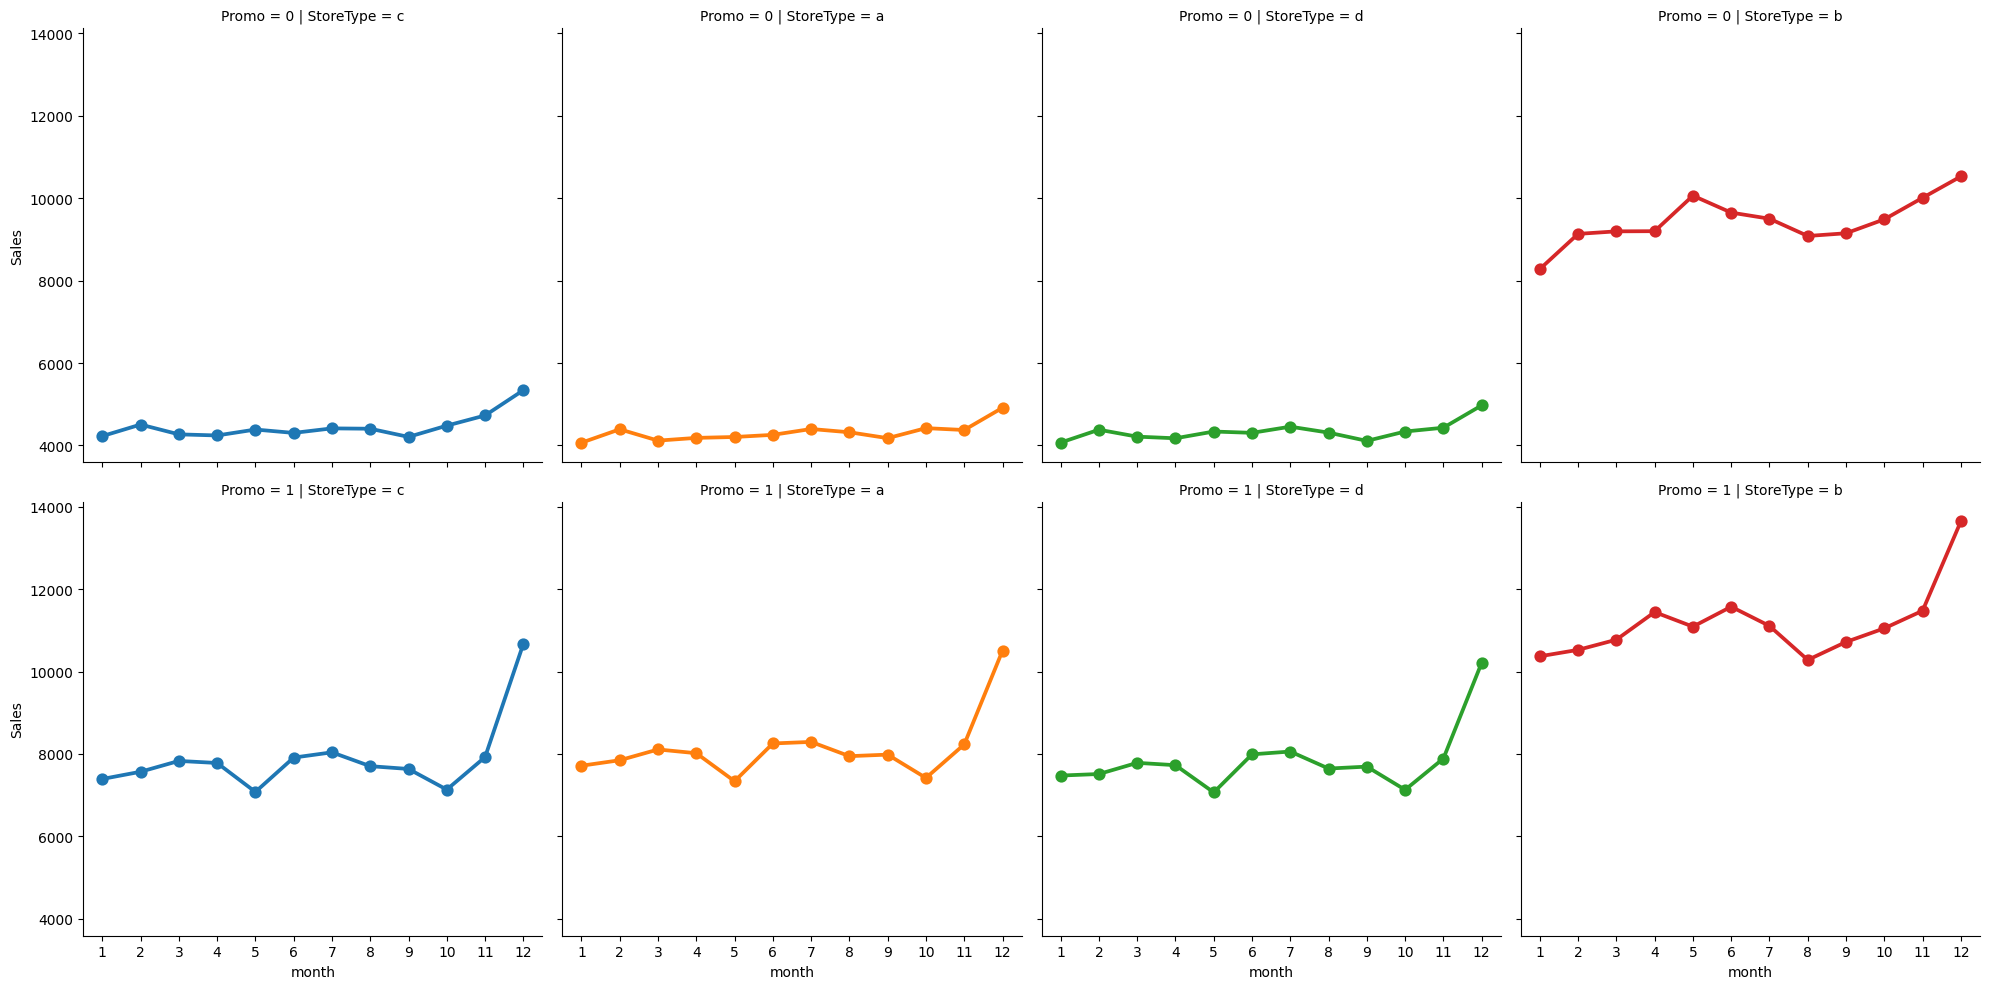

In [ ]:
# Chart - 8 visualization code

sns.catplot(x ='month', y ='Sales', data = df, row ='Promo', col ='StoreType', hue ='StoreType', kind="point", ci = None)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

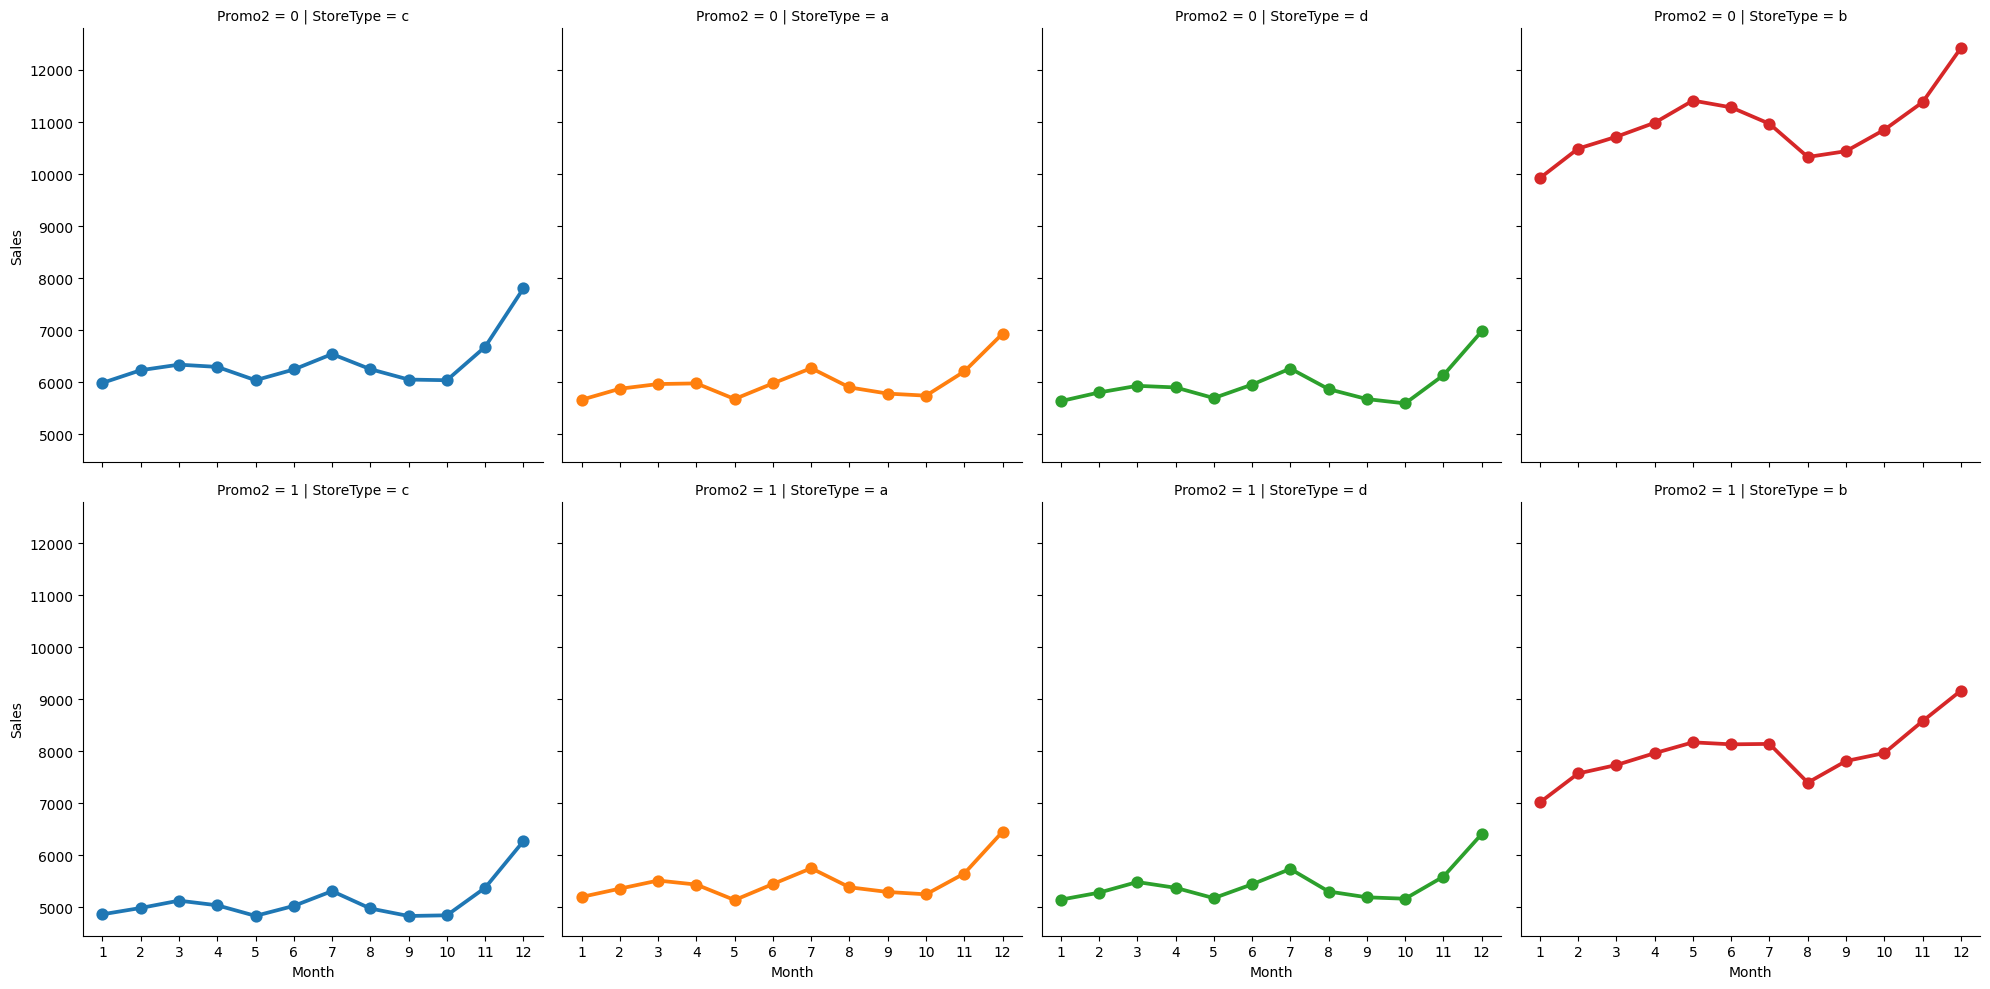

In [ ]:
# Chart - 9 visualization code

sns.catplot(x ='Month', y ='Sales', data = df, row ='Promo2', col ='StoreType', hue ='StoreType', kind="point", ci = None)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

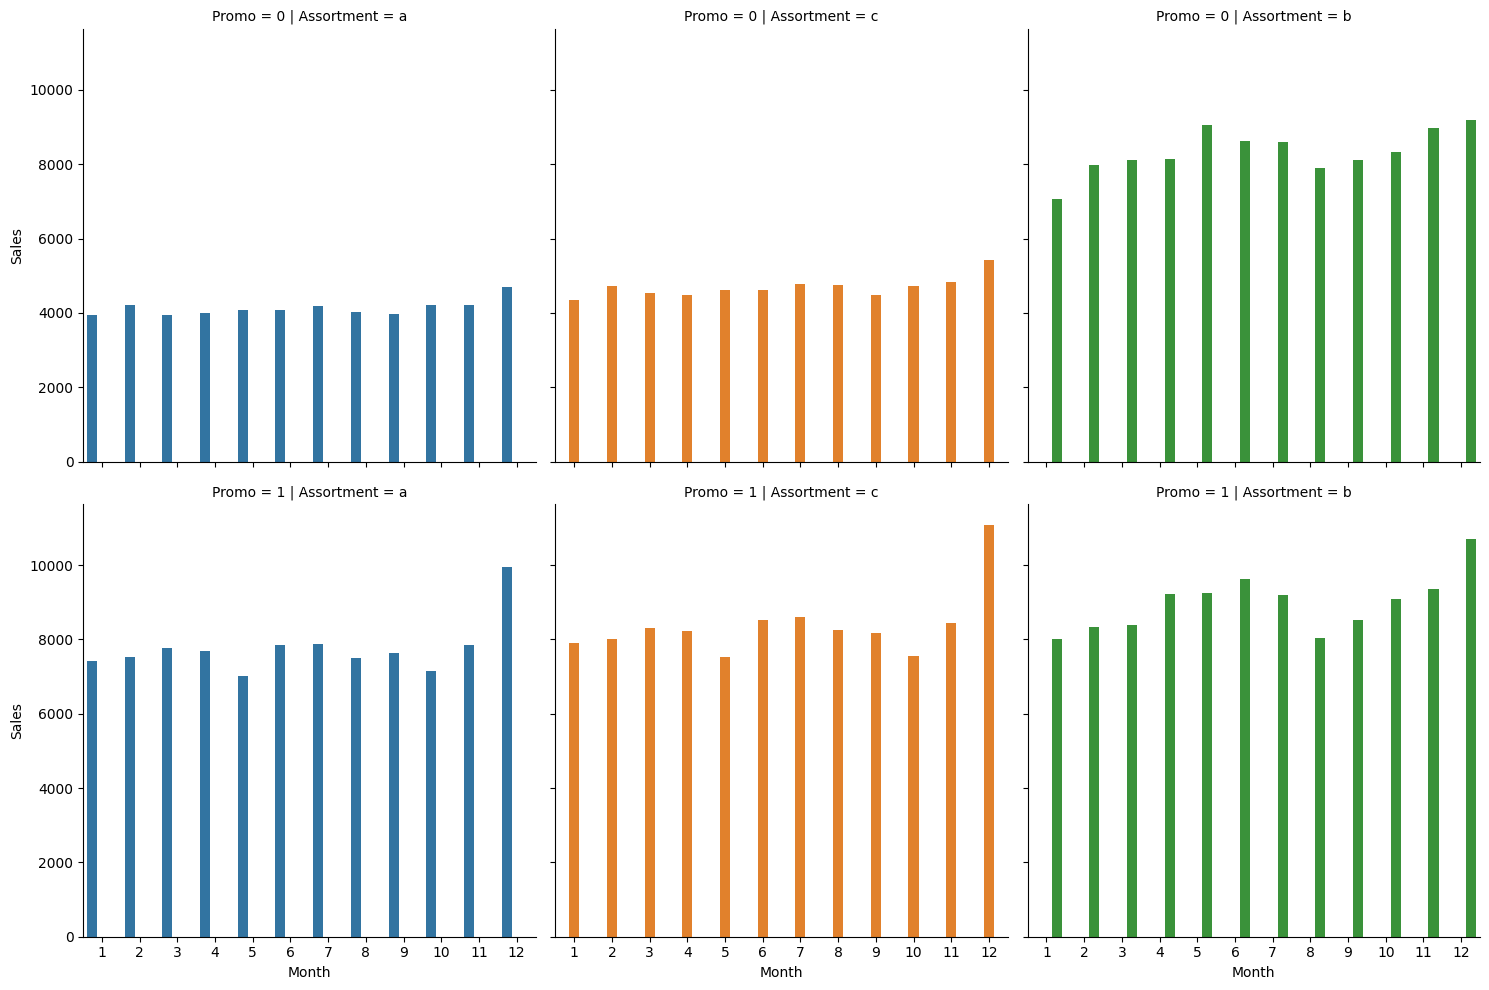

In [ ]:
# Chart - 10 visualization code

sns.catplot(x ='Month', y ='Sales', data = df, row ='Promo', col ='Assortment', hue ='Assortment', kind = 'bar', ci = None)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

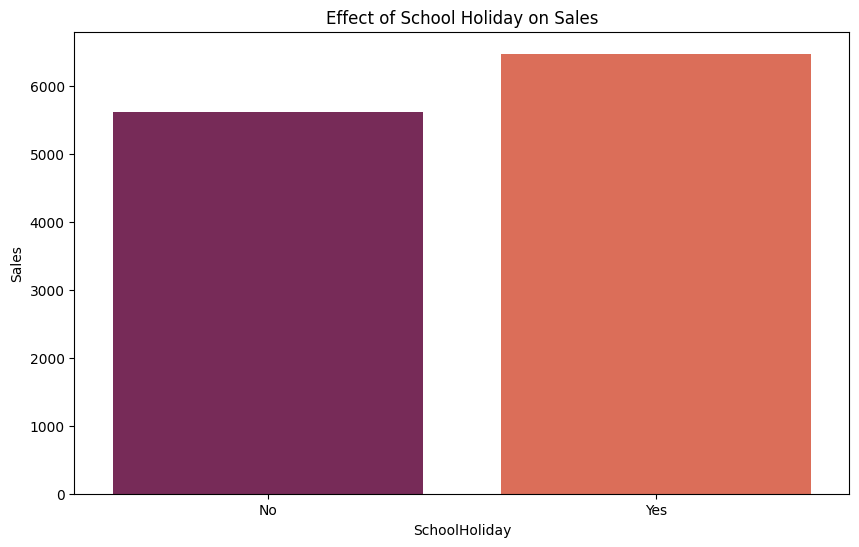

In [ ]:
# Chart - 11 visualization code

# Bar plot to check if there is any effect of school holidays on sales
sns.barplot(x ='SchoolHoliday', y ='Sales', data = df, palette ='rocket', ci = None)
plt.title('Effect of School Holiday on Sales')
plt.xticks([0,1],labels = ['No','Yes'])

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

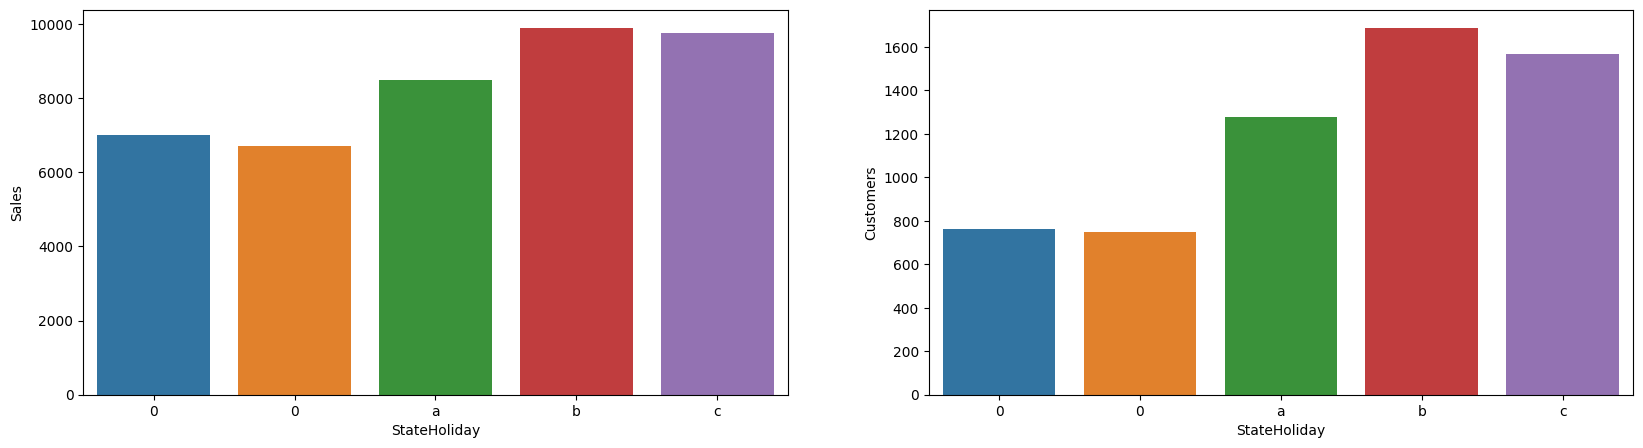

In [ ]:
# Chart - 12 visualization code

# Setting axes to the subplots
fig , (ax1,ax2) = plt.subplots(nrows= 1, ncols = 2, figsize = (20,5))

sns.barplot(x ='StateHoliday', y ='Sales', data = df[df['Open'] != 0], ax = ax1, ci = None)
sns.barplot(x ='StateHoliday', y ='Customers', data = df[df['Open'] != 0], ax = ax2, ci = None)

plt.rcParams.update()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

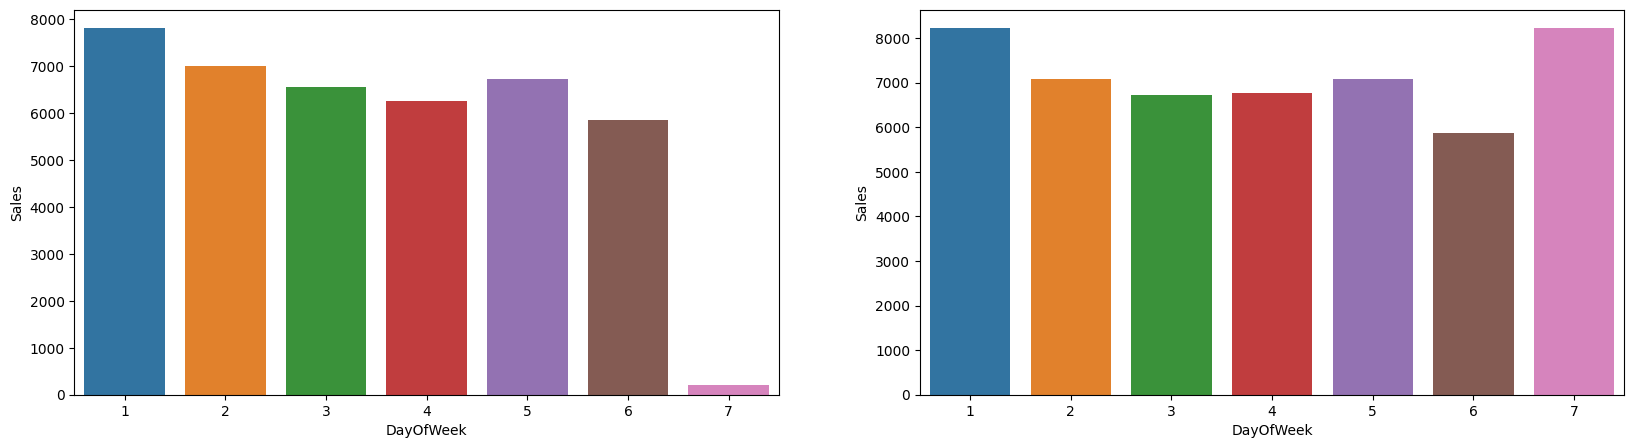

In [ ]:
# Chart - 13 visualization code

# Setting axes to the subplots
fig , (ax1,ax2) = plt.subplots(nrows= 1, ncols = 2, figsize = (20,5))

sns.barplot(x ='DayOfWeek', y ='Sales', data = df, ax = ax1, ci =None)
sns.barplot(x ='DayOfWeek', y ='Sales', data = df[ df['Open'] != 0], ax = ax2, ci = None)

plt.rcParams.update()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

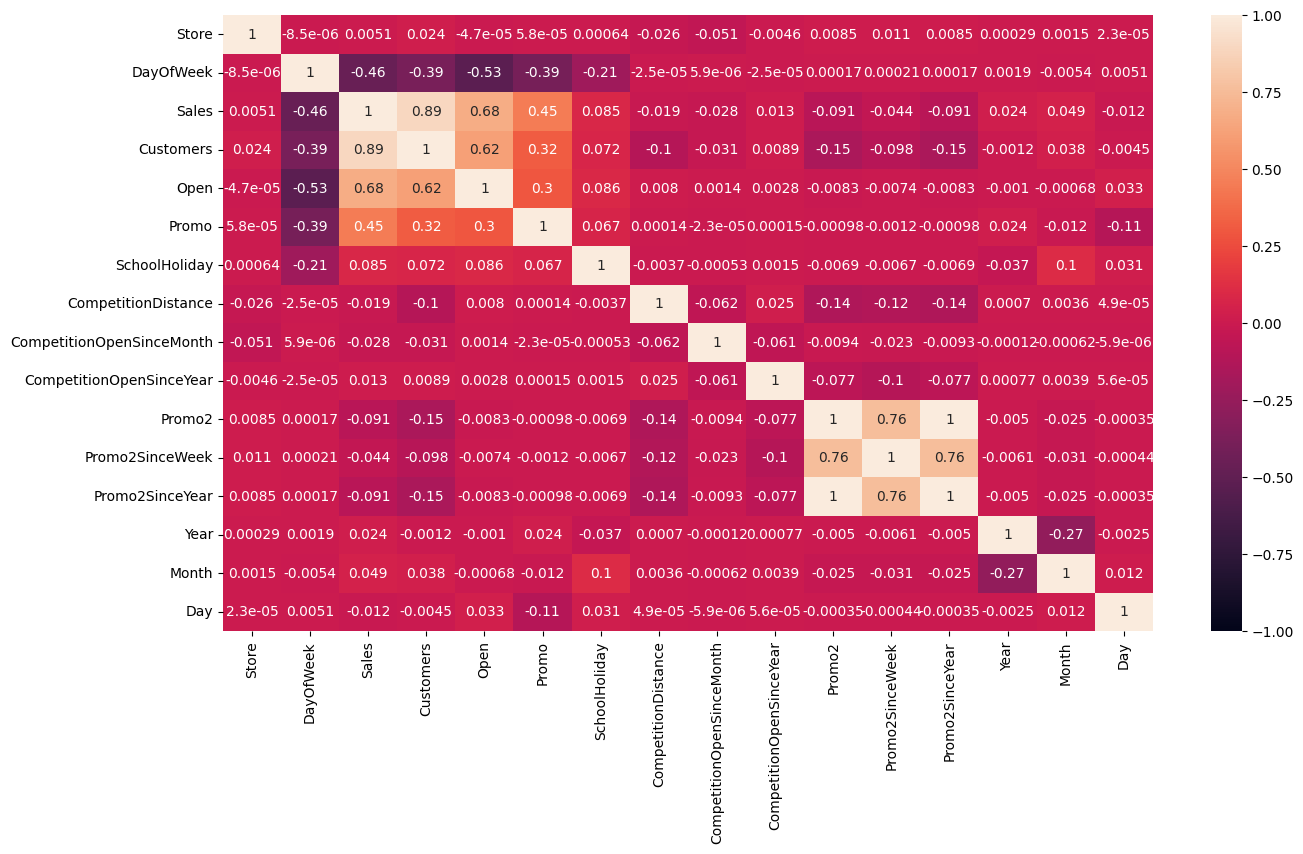

In [ ]:
# Correlation Heatmap visualization code

# Setting the plot size
f, ax = plt.subplots(figsize=(15,8))

# Creating a heat map of 'store' to find correlation
sns.heatmap(df.corr(),  vmin=-1, annot = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

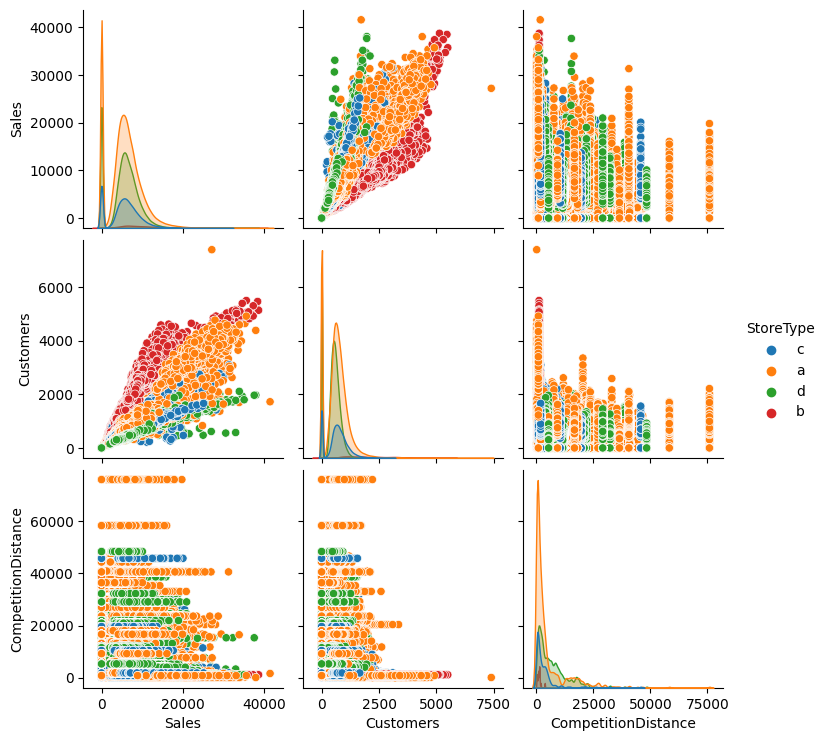

In [ ]:
# Pair Plot visualization code

# Pair Plot visualization code
sns.pairplot(df, vars = ['Sales', 'Customers', 'CompetitionDistance'], hue="StoreType")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

The hypothesis that I would like to test are:

1. The average sales in store type 'b' is atleast 50% higher than that of store type 'a' (i.e. majority of the stores).

2. Promo2 does not affect sales i.e. sales in stores running Promo2 is equal to sales in stores not running Promo2.

3. Sales is affected (i.e. lesser sales than average) if the competition distance is less than 2,000 meters.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average sales in store type 'b' is atleast 50% higher than that of store type 'a'.

Null Hypothesis     : S_b = 1.5 * S_a

Alternate Hypothesis: S_b < 1.5 * S_a

Test Type: Left Tailed Test

In [21]:
from scipy.stats import *
from statsmodels.stats.weightstats import ztest

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Checking for information about missing values in all the columns

print("The number of missing/null values in each feature of the dataset : \n",df.isnull().sum())

The number of missing/null values in each feature of the dataset : 
 Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


There are 6 columns with missing\null values:

'CompetitionDistance ', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval'.

In [ ]:
# Handling Missing Values & Missing Value Imputation

# Filling the null values in 'CompetitionDistance', 'CompetitionOpenSinceMonth and 'CompetitionOpenSinceYear' with the respective median value
df.CompetitionDistance.fillna(df.CompetitionDistance.median(), inplace = True)
df.CompetitionOpenSinceMonth.fillna(df.CompetitionOpenSinceMonth.median(), inplace = True)
df.CompetitionOpenSinceYear.fillna(df.CompetitionOpenSinceYear.median(), inplace = True)

In [ ]:
# Checking for value count of 'Promo2'
df['Promo2'].value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

There are 509,178 observations that belong to Rossmann stores participating in Promo2 and 508,031 observations that pertain to Rossmann stores that are not participating in Promo2.

In [ ]:
# Filling the null values in 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' with 0
df.Promo2SinceWeek.fillna(0, inplace = True)
df.Promo2SinceYear.fillna(0, inplace = True)
df.PromoInterval.fillna('0', inplace = True)

In [ ]:
# Counting total missing/null values in each column of the dataset to check if there are any such cases left
print("The number of missing/null values in each feature of the dataset : \n",df.isnull().sum())

The number of missing/null values in each feature of the dataset : 
 Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

* The null values in the columns: 'CompetitionDistance', 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' can be handled in multiple ways. We can do mean or median imputation. Alternatively, we can also impute the maximum value of competition distance or simply assign 0, meaning there is no competition. It is not proper to go with the latter option because generally, stores do have competition in their vicinity. It is also not appropriate to do mean imputation as the presence of outliers affects the mean.

* I have therefore filled all the null values in the columns: 'CompetitionDistance', 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with their respective median values.


* The count of observations from stores that are not participating in Promo2 (i.e. 508031) is the same as the number of null observations in the columns- 'Promo2SinceWeek',	'Promo2SinceYear' and	'PromoInterval'. This implies that these observations in the mentioned three columns have missing/null values, because they pertain to the stores which are not running Promo2.

* Hence, I filled the null observations in the columns: 'Promo2SinceWeek',	'Promo2SinceYear' and	'PromoInterval' with the value 0.

### 2. Handling Outliers

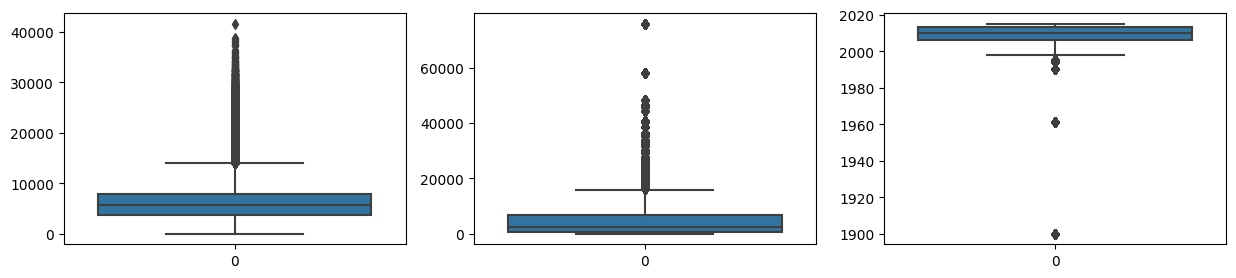

In [46]:
# Handling Outliers & Outlier treatments

# Creating a list of columns that contain numerical data with possible outliers
columns = ['Sales','CompetitionDistance','CompetitionOpenSinceYear']

# Setting the display figure size
plt.figure(figsize=(15,3))

n = 1

# Creating boxplots for each of the column/features
for col in columns:
  plt.subplot(1,3,n)
  n = n+1
  sns.boxplot(df[col])

In [42]:
# Setting a value of 20000 to all the observations of 'Sales' that are greater than 20000
df.loc[df.Sales > 20000, 'Sales'] = 20000

# Setting a value of 20000  to all the observations of 'CompetitionDistance' that are greater than 20000
df.loc[df.CompetitionDistance > 20000 , 'CompetitionDistance'] = 20000

# Setting a value of 2000 to all the observations of 'CompetitionOpenSinceYear' that are less than 2000
df.loc[df.CompetitionOpenSinceYear < 2000, 'CompetitionOpenSinceYear'] = 2000

##### What all outlier treatment techniques have you used and why did you use those techniques?

I handled these outliers by assigning a value for all the observations beyond the whiskers of the box plot which is Q3+1.5IQ and Q1–1.5*IQ

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

# **Conclusion**

Write the conclusion here.